<a href="https://colab.research.google.com/github/NatashaKamami/Advanced_ML/blob/main/AirQuality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=ce23731f9eae8d05029074fd323bc5e88e1809fe9a7fa0967a23f116eb5cdda4
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arff
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Modelling and Forecasting
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# Path to your .arff file
file_path = "/content/air_dataset.arff"

# Load the .arff file
with open(file_path, 'r') as file:
    data = arff.load(file)

# Extract data and column names
data_rows = data['data']
columns = [attribute[0] for attribute in data['attributes']]

# Convert to Pandas DataFrame
df = pd.DataFrame(data_rows, columns=columns)
df.head(10)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


# Dealing with missing values

In [ ]:
df.interpolate(method='linear', inplace=True) # interpolating data in numeric columns
df.drop(columns=['No', 'wd', 'station'], inplace=True) # deleting unnecessary columns

In [ ]:
# Ensure the 'year', 'month', 'day', 'hour' are combined into a datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])

# Convert to datetime and set as index
df.set_index('datetime', inplace=True)

# Aggregate to monthly frequency
monthly_data = df.resample('M').mean()  # Resample to monthly frequency and take the mean


## Using SARIMAX

Mean Absolute Error (SARIMAX) for PM2.5: 14.055604133603197


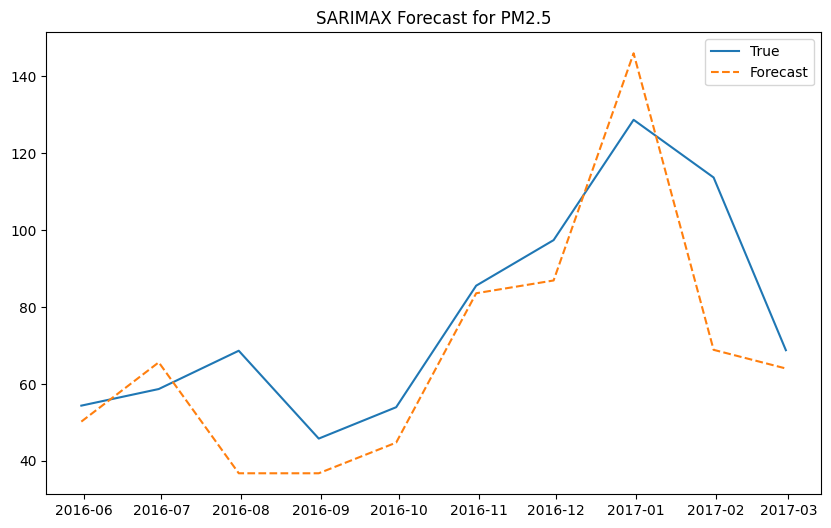

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (SARIMAX) for PM10: 18.924166156375954


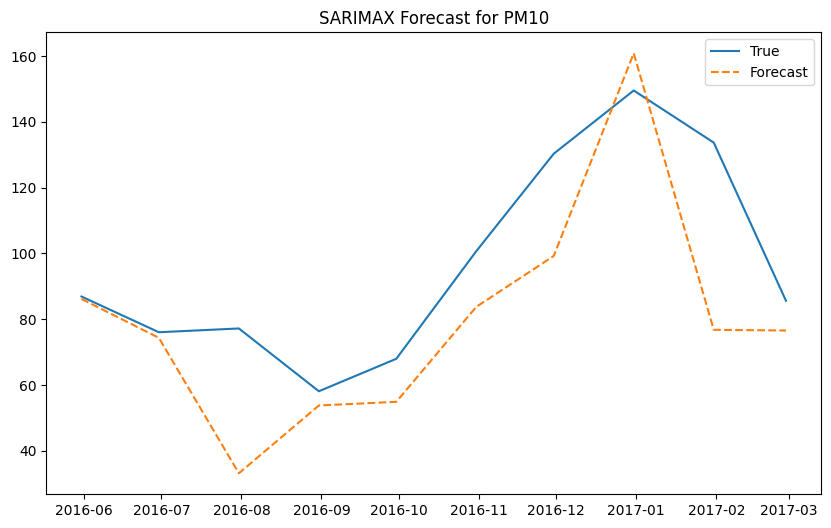

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (SARIMAX) for SO2: 4.994324977799853


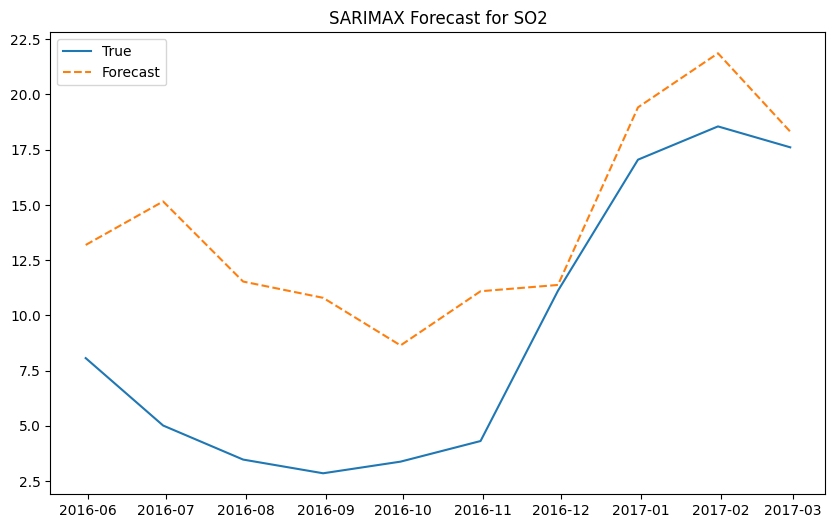

Mean Absolute Error (SARIMAX) for NO2: 5.59399059637329


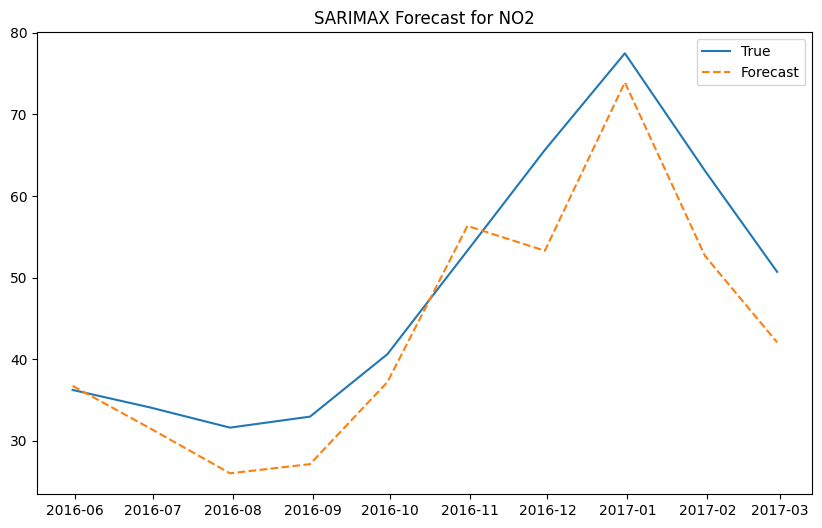

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (SARIMAX) for CO: 120.26751511200173


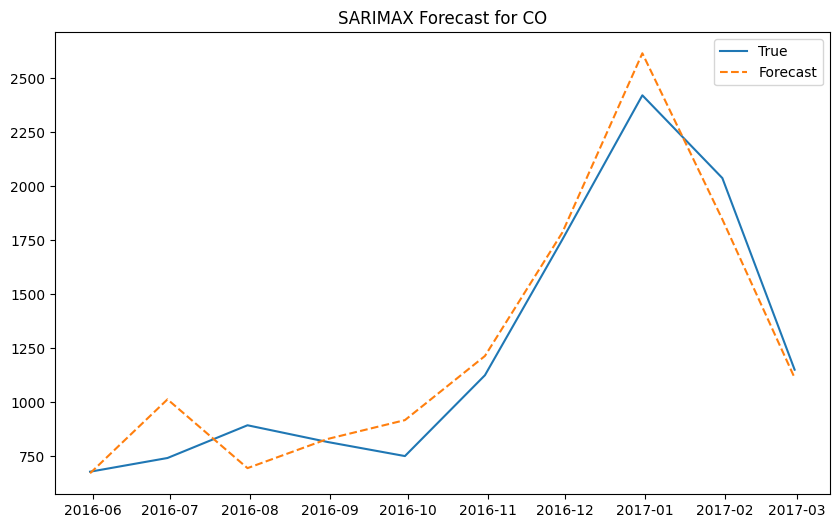

Mean Absolute Error (SARIMAX) for O3: 5.8087817744607495


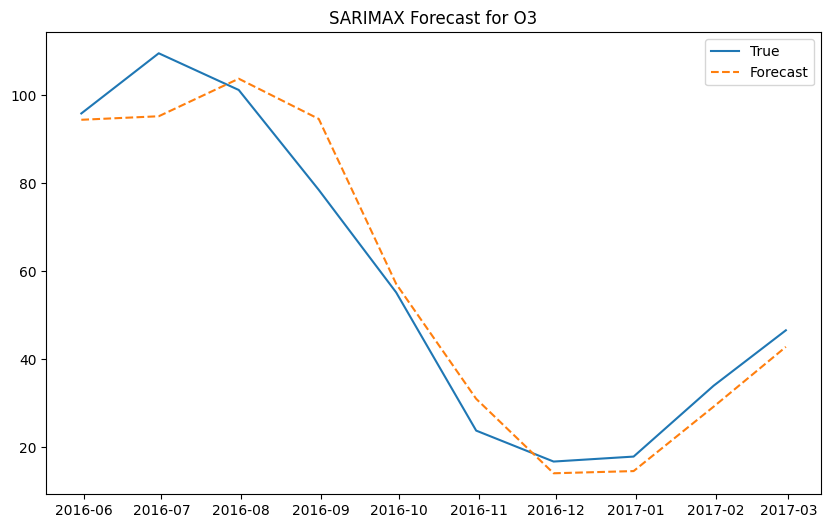

In [ ]:
# Select target variables (e.g., PM2.5, PM10) and exogenous variables(independent variables)
targets = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
exog_vars = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Splitting the data into train and test sets
train, test = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Initialize SARIMAX models for each target variable
sarimax_forecasts = {}

for target in targets:
    sarimax_model = SARIMAX(train[target], exog=train[exog_vars],
                           order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))

    # Fit the model
    sarimax_results = sarimax_model.fit()

    # Forecast
    forecast = sarimax_results.forecast(steps=len(test), exog=test[exog_vars])

    # Store forecast
    sarimax_forecasts[target] = forecast

    # Evaluate the model
    mae = mean_absolute_error(test[target], forecast)
    print(f'Mean Absolute Error (SARIMAX) for {target}: {mae}')

    # Plot the forecast
    plt.figure(figsize=(10,6))
    plt.plot(test.index, test[target], label='True')
    plt.plot(test.index, forecast, label='Forecast', linestyle='--')
    plt.title(f'SARIMAX Forecast for {target}')
    plt.legend()
    plt.show()


### Using Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/n2iszoqf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/ar9_f8sc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14629', 'data', 'file=/tmp/tmp8tha0g5a/n2iszoqf.json', 'init=/tmp/tmp8tha0g5a/ar9_f8sc.json', 'output', 'file=/tmp/tmp8tha0g5a/prophet_modelvpvrwsni/prophet_model-20250117061645.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


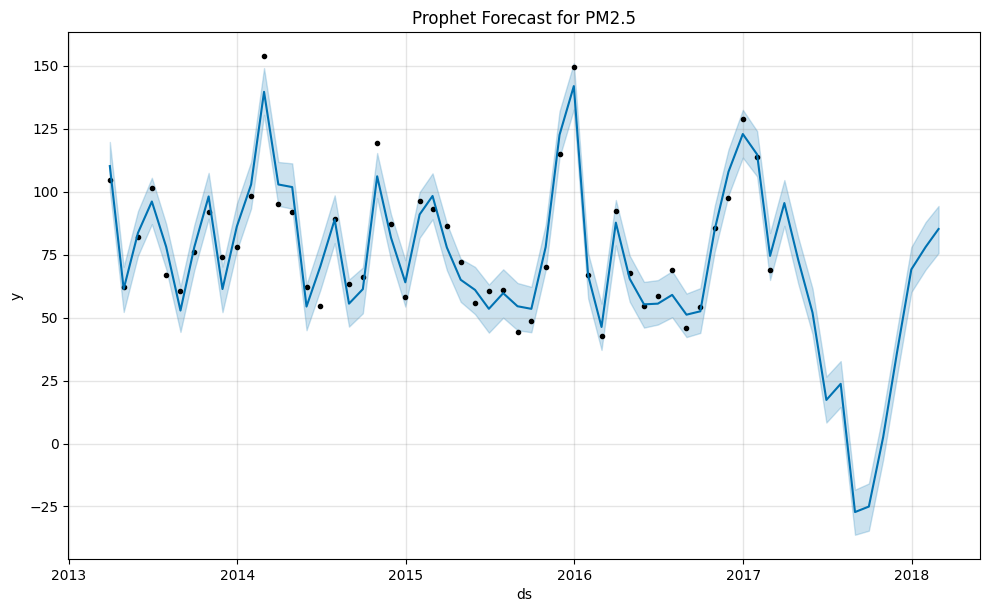

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/_2mfy3zx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/d8wcoyk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84231', 'data', 'file=/tmp/tmp8tha0g5a/_2mfy3zx.json', 'init=/tmp/tmp8tha0g5a/d8wcoyk2.json', 'output', 'file=/tmp/tmp8tha0g5a/prophet_modelpaf920rz/prophet_model-20250117061646.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error (Prophet) for PM2.5: 42.12744459838952


06:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


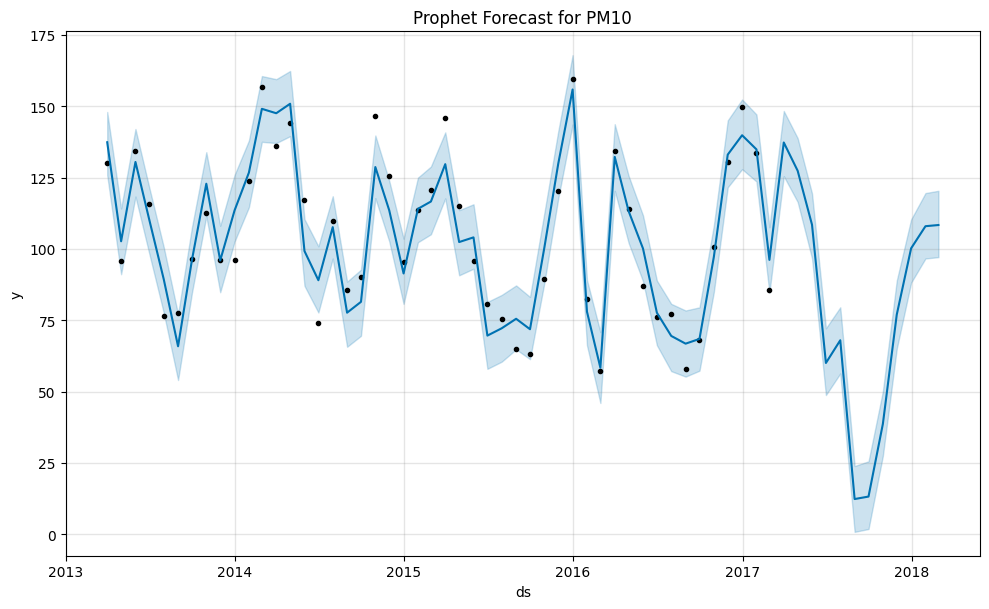

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/cjr9lla7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/oz_66vj6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96708', 'data', 'file=/tmp/tmp8tha0g5a/cjr9lla7.json', 'init=/tmp/tmp8tha0g5a/oz_66vj6.json', 'output', 'file=/tmp/tmp8tha0g5a/prophet_modell_zd2pxy/prophet_model-20250117061647.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error (Prophet) for PM10: 31.40018196702358


06:16:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


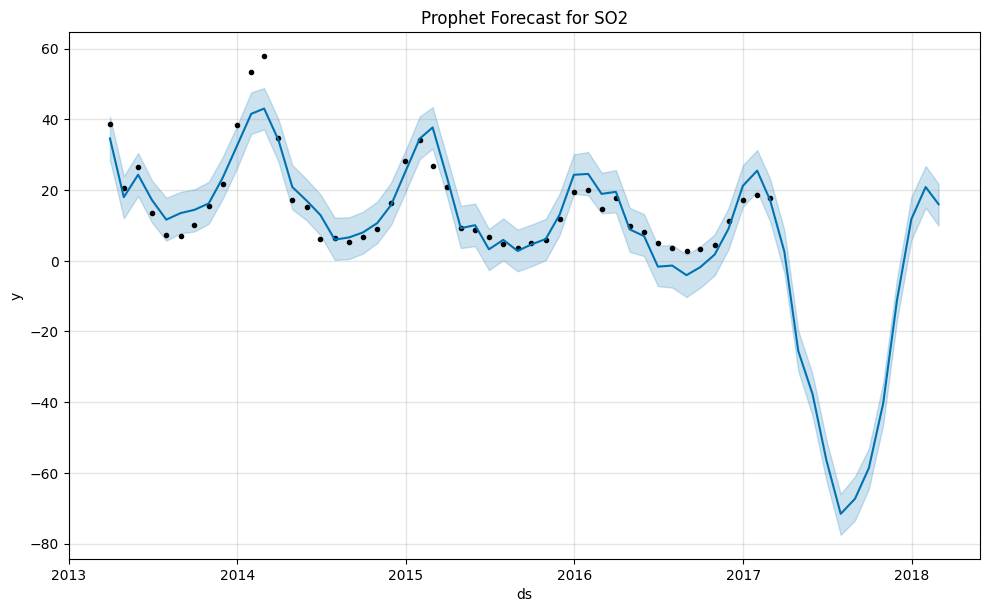

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/kw4qdxed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/1xo8f61d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66742', 'data', 'file=/tmp/tmp8tha0g5a/kw4qdxed.json', 'init=/tmp/tmp8tha0g5a/1xo8f61d.json', 'output', 'file=/tmp/tmp8tha0g5a/prophet_modelxdi6jvzs/prophet_model-20250117061647.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error (Prophet) for SO2: 36.76750020965587


06:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


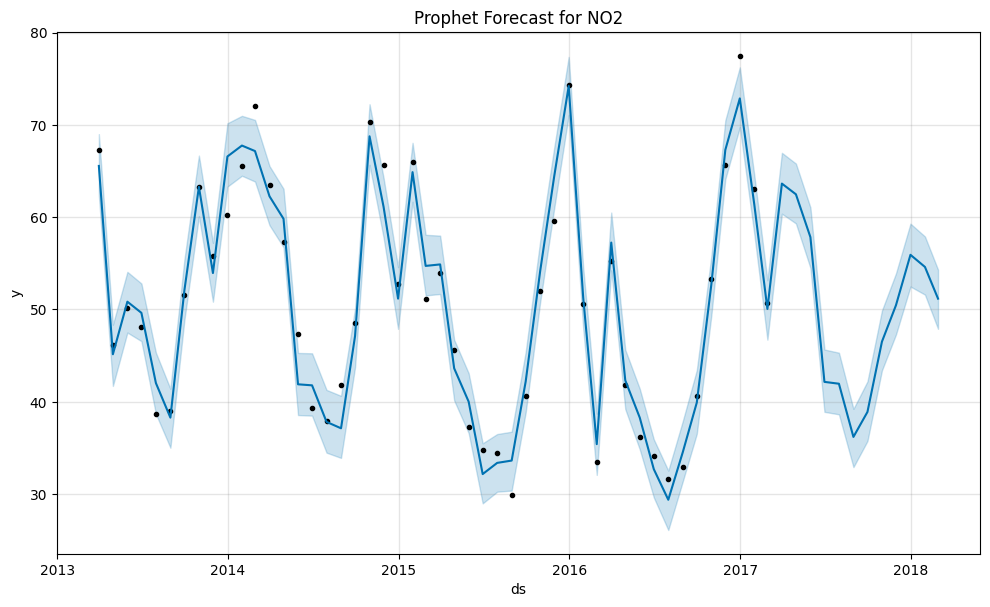

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/clwz_pdc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/773ryho4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33182', 'data', 'file=/tmp/tmp8tha0g5a/clwz_pdc.json', 'init=/tmp/tmp8tha0g5a/773ryho4.json', 'output', 'file=/tmp/tmp8tha0g5a/prophet_modelcyldap6b/prophet_model-20250117061648.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error (Prophet) for NO2: 10.544254917522986


06:16:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


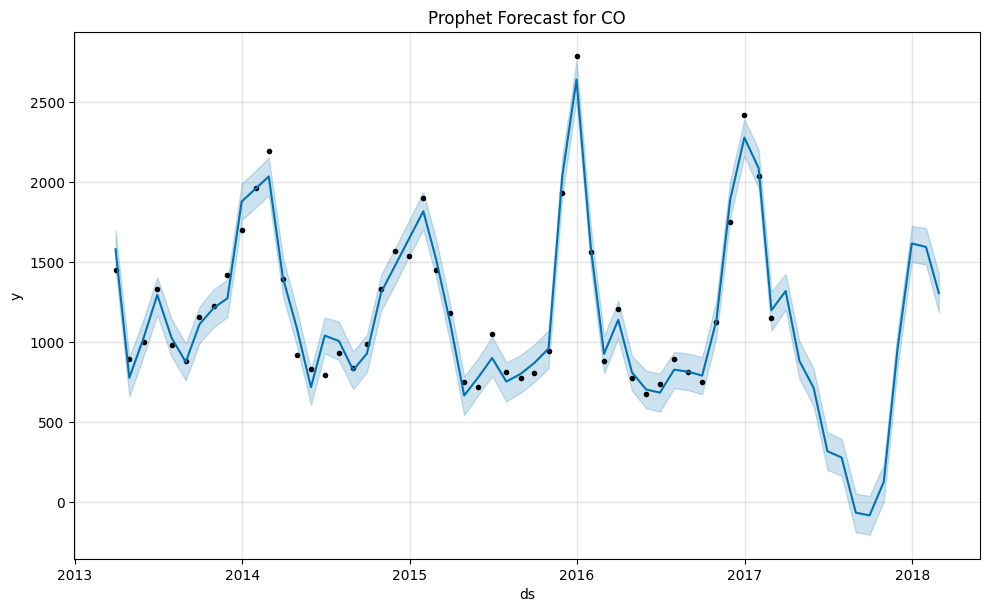

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/kocwn704.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8tha0g5a/zmr3ix6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24517', 'data', 'file=/tmp/tmp8tha0g5a/kocwn704.json', 'init=/tmp/tmp8tha0g5a/zmr3ix6x.json', 'output', 'file=/tmp/tmp8tha0g5a/prophet_modeloamq1sha/prophet_model-20250117061649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:16:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Mean Absolute Error (Prophet) for CO: 516.0485427958698


06:16:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


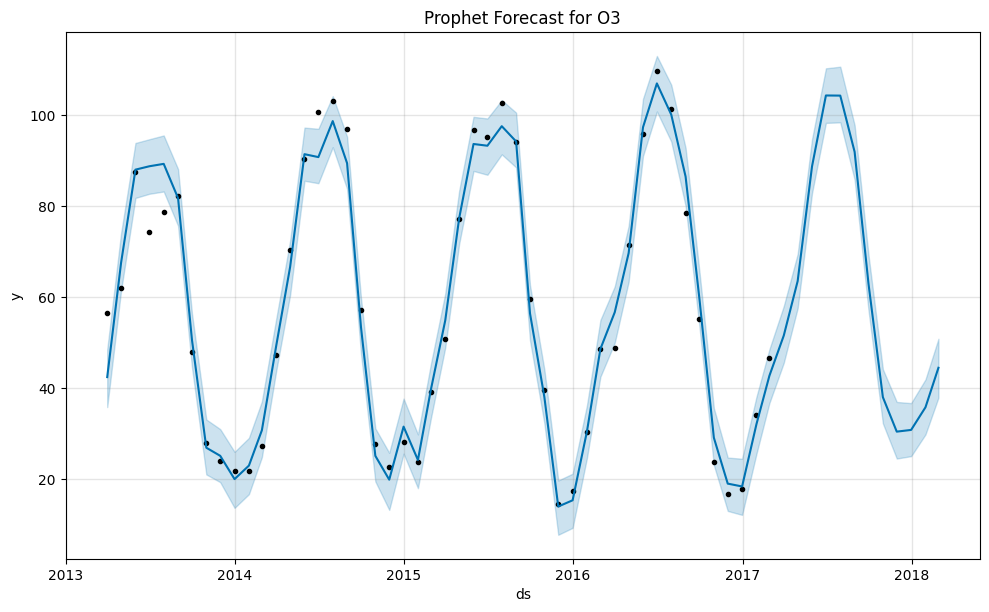

Mean Absolute Error (Prophet) for O3: 7.656135638898287


In [ ]:
# Initialize an empty dictionary to store models and forecasts
prophet_forecasts = {}

for target in targets:
    # Prepare the data for Prophet
    # Include all necessary columns (target and regressors)
    df_prophet = monthly_data.reset_index()[['datetime', target, 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].rename(columns={'datetime': 'ds', target: 'y'})

    # Initialize and fit the Prophet model
    prophet_model = Prophet()
    prophet_model.add_regressor('TEMP')
    prophet_model.add_regressor('PRES')
    prophet_model.add_regressor('DEWP')
    prophet_model.add_regressor('RAIN')
    prophet_model.add_regressor('WSPM')

    # Fit the model
    prophet_model.fit(df_prophet)

    # Make future dataframe
    future = prophet_model.make_future_dataframe(periods=12, freq='M') # Removed df_prophet here

    # Add exogenous variables to the future dataframe
    # Merge to include regressors in the future dataframe
    future = pd.merge(future, monthly_data.reset_index()[['datetime', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']],
                      left_on='ds', right_on='datetime', how='left').drop(columns=['datetime'])  # reset_index and merge

    # Fill NaN values in regressors using a suitable method (e.g., forward fill)
    future[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']] = future[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].fillna(method='ffill')

    # Forecast
    forecast = prophet_model.predict(future)

    # Store forecast for each target variable
    prophet_forecasts[target] = forecast

    # Plot forecast
    prophet_model.plot(forecast)
    plt.title(f'Prophet Forecast for {target}')
    plt.show()

    # Evaluate the model
    test = df_prophet.tail(12)  # Last 12 months as the test set
    mae = mean_absolute_error(test['y'], forecast['yhat'][-len(test):])
    print(f'Mean Absolute Error (Prophet) for {target}: {mae}')